In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)

2. Работа с табличными данными в <a href='http://pandas.pydata.org/pandas-docs/stable/'>Pandas</a>
----------
Pandas может представлять массивы NumPy с метками для строк и столбцов. Начнем с примера.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


Ответим на некоторые вопросы о представленном наборе данных.

**Посмотрим на распределение возраста пассажиров Титаника**

<AxesSubplot:>

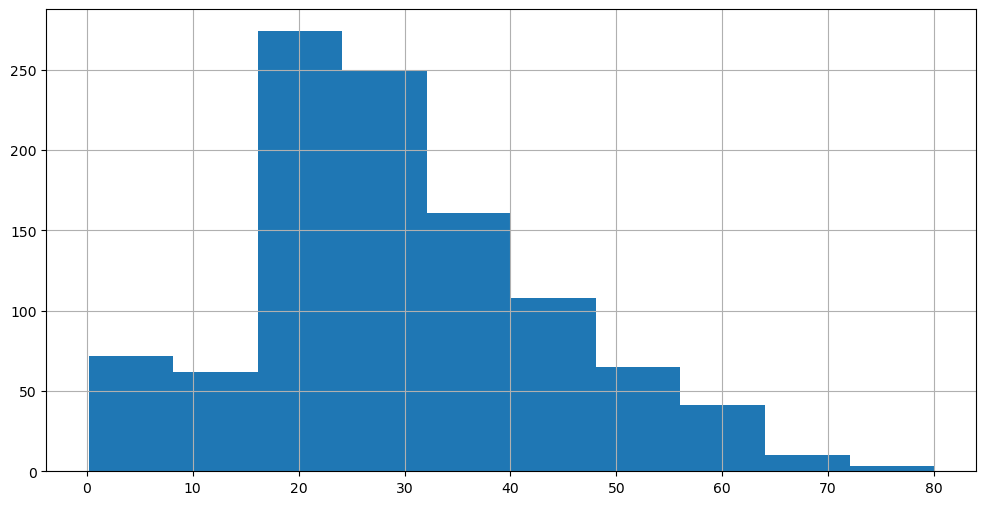

In [5]:
df['age'].hist()

**Скольким мужчинам / женщинам удалось выжить?**

In [6]:
pd.crosstab(df['sex'], df['survived'])

survived,0,1
sex,,
female,127,339
male,682,161


In [7]:
pd.crosstab(df['sex'], df['survived'], normalize=0)

survived,0,1
sex,,
female,0.272532,0.727468
male,0.809015,0.190985


**А каковы доли выживших в различных ценовых классах?**

In [8]:
df.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

<AxesSubplot:xlabel='pclass'>

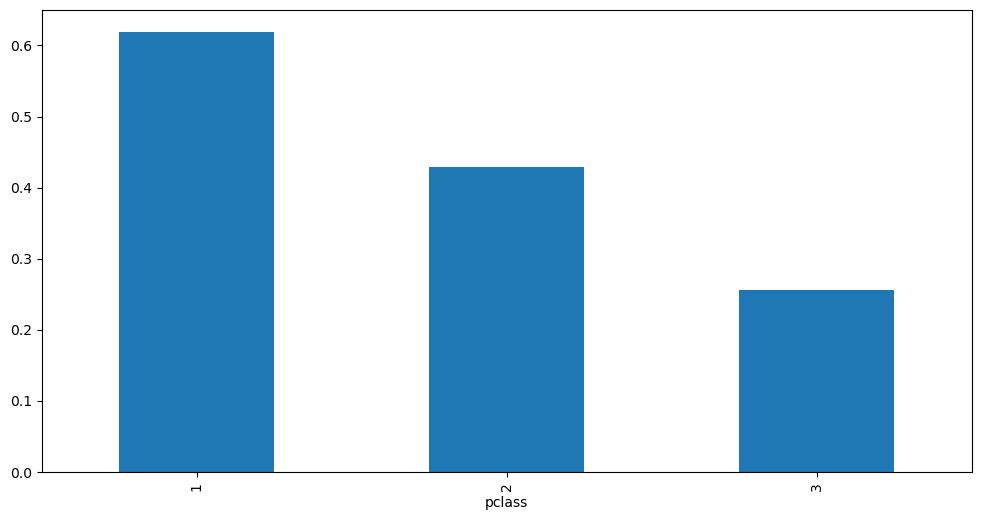

In [9]:
df.groupby('pclass')['survived'].mean().plot(kind='bar')

## 2.1. Структуры данных в Pandas

### 2.1.1. DataFrame

`DataFrame` - представление данных в виде таблицы. Основными атрибутами являются `index` и `columns`.

In [10]:
df.index

RangeIndex(start=0, stop=1309, step=1)

In [11]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [12]:
df.values

array([[1, 1, 'Allen, Miss. Elisabeth Walton', ..., '2', nan,
        'St Louis, MO'],
       [1, 1, 'Allison, Master. Hudson Trevor', ..., '11', nan,
        'Montreal, PQ / Chesterville, ON'],
       [1, 0, 'Allison, Miss. Helen Loraine', ..., nan, nan,
        'Montreal, PQ / Chesterville, ON'],
       ...,
       [3, 0, 'Zakarian, Mr. Mapriededer', ..., nan, 304.0, nan],
       [3, 0, 'Zakarian, Mr. Ortin', ..., nan, nan, nan],
       [3, 0, 'Zimmerman, Mr. Leo', ..., nan, nan, nan]], dtype=object)

Для предварительного анализа пригодятся встроенные функции:

In [13]:
df.shape

(1309, 14)

In [14]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


`DataFrame` можно создать с помощью словаря Python.

In [16]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


<p><a name="series"></a></p>
### 2.1.2. Series

`Series` служит для представления одномерных данных. Проще говоря, это столбец `DataFrame`.

In [17]:
df['pclass']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [18]:
df.pclass

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

Основными атрибутами `Series` являются `index` и `values`.

In [19]:
df['pclass'].index

RangeIndex(start=0, stop=1309, step=1)

In [20]:
df['pclass'].values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
df['pclass'][1]

1

К `Series` можно применять различные операции.

In [22]:
df['age'] * 10

0       290.000
1         9.167
2        20.000
3       300.000
4       250.000
         ...   
1304    145.000
1305        NaN
1306    265.000
1307    270.000
1308    290.000
Name: age, Length: 1309, dtype: float64

In [23]:
df['fare'].mean()

33.29547928134572

In [24]:
df['name'].apply(lambda x: x.split(',')[1])

0                        Miss. Elisabeth Walton
1                         Master. Hudson Trevor
2                           Miss. Helen Loraine
3                   Mr. Hudson Joshua Creighton
4        Mrs. Hudson J C (Bessie Waldo Daniels)
                         ...                   
1304                               Miss. Hileni
1305                              Miss. Thamine
1306                            Mr. Mapriededer
1307                                  Mr. Ortin
1308                                    Mr. Leo
Name: name, Length: 1309, dtype: object

In [25]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [26]:
df['surname'] = df['name'].apply(lambda x: x.split(',')[0])

In [27]:
q = df['fare'].quantile(0.75)
q

31.275

In [28]:
def expensive_ticket(fare):
    return 'Expensive' if (fare > q) else 'Cheap'

In [29]:
df['fare'].apply(expensive_ticket)

0       Expensive
1       Expensive
2       Expensive
3       Expensive
4       Expensive
          ...    
1304        Cheap
1305        Cheap
1306        Cheap
1307        Cheap
1308        Cheap
Name: fare, Length: 1309, dtype: object

**Задание 1**
+ Какой была максимальная цена билета? Медиана?
+ Какова доля выживших?
+ Сколько мужчин / женщин находилось на борту?

In [30]:
print(f'Максимальная цена билета: {df["fare"].max()}')

Максимальная цена билета: 512.3292


In [31]:
print(f'Медиана цены билета: {df["fare"].median()}')

Медиана цены билета: 14.4542


In [32]:
print(f'Доля выживших составляет: {df["survived"].sum() / df.shape[0]}')

Доля выживших составляет: 0.3819709702062643


In [33]:
print(f'На борту находилось {df[df["sex"] == "male"]["sex"].count()} мужчин(ы)')

На борту находилось 843 мужчин(ы)


In [34]:
print(f'На борту находилось {df[df["sex"] == "female"]["sex"].count()} женщин(ы)')

На борту находилось 466 женщин(ы)


**Задание 2**
+ Выведите распределение переменной __pclass__ для мужчин и женщин.
    + Сколько мужчин было в первом классе?
    + Сколько женщин было в третьем классе?
      
+ Создайте новый признак __age_group__, который равен:
    + 1, если пассажир был моложе 30 лет;
    + 2, если пассажиру было от 30 до 60 лет;
    + 3, если пассажир был старше 60 лет.

[Text(0, 0, '144'), Text(0, 0, '106'), Text(0, 0, '216')]

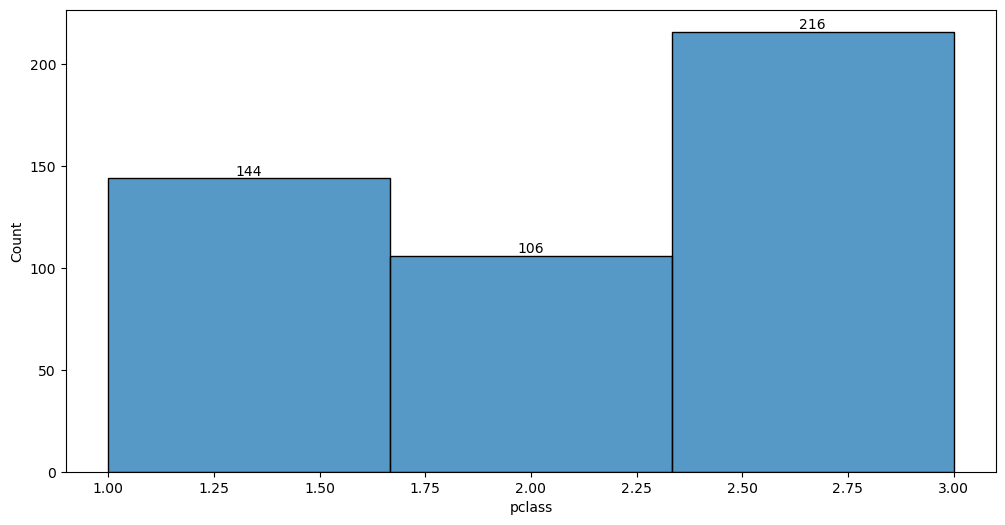

In [35]:
import seaborn as sns
ax = sns.histplot(data=df[df["sex"] == "female"], x='pclass', bins=3)
ax.bar_label(ax.containers[0])

[Text(0, 0, '179'), Text(0, 0, '171'), Text(0, 0, '493')]

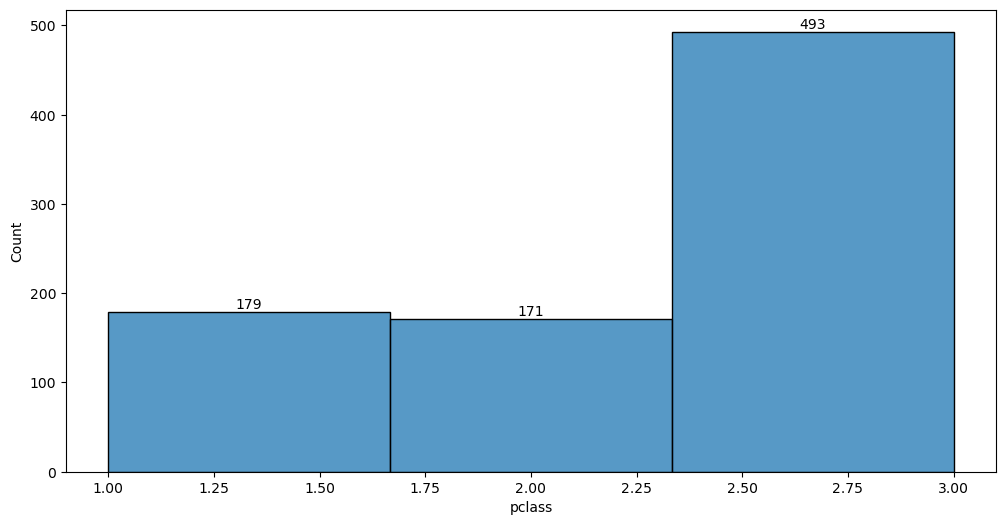

In [36]:
ax = sns.histplot(data=df[df["sex"] == "male"], x='pclass', bins=3)
ax.bar_label(ax.containers[0])

В первом классе находилось **179 мужчин**, а в третьем классе было **216 женщин**

In [37]:
df = df.dropna(subset=['age'])
df['age'] = df['age'].astype('int')

In [38]:
def grouped(row):
    val = None 
    if row['age'] < 30:
        val = 1
    elif 30 <= row['age'] < 60:
        val = 2
    elif row['age'] > 60:
        val = 3
    return val
df['age_group'] = df.apply(grouped, axis=1)
df = df.dropna(subset=['age_group'])
df['age_group'] = df['age_group'].astype('int')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,Youseff,2
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1


**Задание 3**\
Найдите самое популярное имя среди пассажиров:
+ мужчин;
+ женщин.

In [75]:
name = df['name'].str.split(', ', expand=True)
df['name_only'] = name[1].str.split('.', expand=True)[1]
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Elisabeth Walton
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson Trevor
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Helen Loraine
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Hudson Joshua Creighton
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson J C (Bessie Waldo Daniels)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,Youseff,2,Gerious
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1,Hileni
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1,Mapriededer
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1,Ortin


In [72]:
df[df['sex'] == 'male']['name_only'].value_counts()

 William             9
 William Henry       6
 James               5
 Ivan                5
 John                5
                    ..
 Hans Kristensen     1
 John William        1
 Ralph               1
 Frederick Edward    1
 Leo                 1
Name: name_only, Length: 570, dtype: int64

In [73]:
df[df['sex'] == 'female']['name_only'].value_counts()

 Kate                                       5
 Elizabeth                                  3
 Anna Sofia                                 3
 Mary                                       3
 Bertha                                     3
                                           ..
 John Stuart (Ella Holmes)                  1
 John Borland (Marian Longstreth Morris)    1
 Emil (Tillie Mandelbaum)                   1
 Ruth                                       1
 Hileni                                     1
Name: name_only, Length: 366, dtype: int64

Таким образом, самое популярное мужское имя - William, а самое распространенное среди пассажиров женское имя - Kate

## 2.2. Извлечение данных

In [40]:
df[['sex', 'age']]

,sex,age
0,female,29
1,male,0
2,female,2
3,male,30
4,female,25
...,...,...
1301,male,45
1304,female,14
1306,male,26
1307,male,27


In [41]:
df[5:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2,Harry
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3,Korneli
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews,2,Thoma
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2,Edwar
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3,Ramon
10,1,0,"Astor, Col. John Jacob",male,47,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Astor,2,Joh
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1,Joh
12,1,1,"Aubart, Mme. Leontine Pauline",female,24,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Aubart,1,Leontin
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26,0,0,19877,78.8500,NaN,S,6,NaN,NaN,Barber,1,Elle
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3,Algerno


### 2.2.1. Индексация с помощью `loc` и `iloc`

In [42]:
df.iloc[5:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2,Harry
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3,Korneli
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews,2,Thoma
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2,Edwar
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3,Ramon
10,1,0,"Astor, Col. John Jacob",male,47,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Astor,2,Joh
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1,Joh
12,1,1,"Aubart, Mme. Leontine Pauline",female,24,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Aubart,1,Leontin
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26,0,0,19877,78.8500,NaN,S,6,NaN,NaN,Barber,1,Elle
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3,Algerno


In [43]:
df.iloc[5:15, 4]

5     48
6     63
7     39
8     53
9     71
10    47
11    18
12    24
13    26
14    80
Name: age, dtype: int32

In [44]:
df.loc[5:15, 'sex']

5       male
6     female
7       male
8     female
9       male
10      male
11    female
12    female
13    female
14      male
Name: sex, dtype: object

### 2.2.2. Булева индексация

Соответствует конструкции WHERE clause в SQL.

In [45]:
df['age'] > 30

0       False
1       False
2       False
3       False
4       False
        ...  
1301     True
1304    False
1306    False
1307    False
1308    False
Name: age, Length: 1038, dtype: bool

In [46]:
df[df['fare'] > 50] # boolean mask

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Elisabet
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudso
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hele
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Hudso
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,3,1,"Bing, Mr. Lee",male,32,0,0,1601,56.4958,NaN,S,C,NaN,"Hong Kong New York, NY",Bing,2,Lee
714,3,1,"Chip, Mr. Chang",male,32,0,0,1601,56.4958,NaN,S,C,NaN,"Hong Kong New York, NY",Chip,2,Chang
949,3,1,"Lang, Mr. Fang",male,26,0,0,1601,56.4958,NaN,S,14,NaN,NaN,Lang,1,Fang
972,3,0,"Ling, Mr. Lee",male,28,0,0,1601,56.4958,NaN,S,NaN,NaN,NaN,Ling,1,Lee


In [47]:
df[(df['sex'] == 'male') & (df['survived'] == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudso
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2,Harry
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3,Algerno
20,1,1,"Beckwith, Mr. Richard Leonard",male,37,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2,Richar
22,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",Behr,1,Kar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,3,1,"Tenglin, Mr. Gunnar Isidor",male,25,0,0,350033,7.7958,NaN,S,13 15,NaN,NaN,Tenglin,1,Gunna
1240,3,1,"Thomas, Master. Assad Alexander",male,0,0,1,2625,8.5167,NaN,C,16,NaN,NaN,Thomas,1,Assa
1254,3,1,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0000,NaN,S,15,NaN,NaN,Tornquist,1,Willia
1256,3,1,"Touma, Master. Georges Youssef",male,7,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Touma,1,George


**Задание 4**
+ Выведите данные о всех пассажирах, которые сели в Cherbourg (Embarked='C') и были старше 50 лет.
+ Выведите данные о всех женщинах младше 20 и старше 50 лет.
+ Сколько пассажиров старше 70 лет было на борту?

In [76]:
df[(df['embarked'] == 'C') & (df['age'] > 50)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3,Ramon
48,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53,0,0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC",Candee,2,Edward (Helen Churchill Hungerford)
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",Cardeza,2,James Warburton Martinez (Charlotte Wardle Dr...
78,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64,0,2,PC 17756,83.1583,E45,C,14,NaN,"Lakewood, NJ",Compton,3,Alexander Taylor (Mary Eliza Ingersoll)
104,1,1,"Eustis, Miss. Elizabeth Mussey",female,54,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA",Eustis,2,Elizabeth Mussey
135,1,0,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY",Goldschmidt,3,George B
136,1,1,"Gracie, Col. Archibald IV",male,53,0,0,113780,28.5000,C51,C,B,NaN,"Washington, DC",Gracie,2,Archibald IV
174,1,0,"Kent, Mr. Edward Austin",male,58,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",Kent,2,Edward Austin
186,1,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55,0,0,112377,27.7208,NaN,C,6,NaN,"Stockholm, Sweden",Lindstrom,2,Carl Johan (Sigrid Posse)
192,1,1,"Lurette, Miss. Elise",female,58,0,0,PC 17569,146.5208,B80,C,NaN,NaN,NaN,Lurette,2,Elise


In [78]:
df[(df['sex'] == 'female') & (df['age'] > 50) | (df['age'] < 20)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson Trevor
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Helen Loraine
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3,Kornelia Theodosia
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2,Edward Dale (Charlotte Lamson)
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1,John Jacob (Madeleine Talmadge Force)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,3,0,"Vander Planke, Mr. Leo Edmondus",male,16,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN,Vander Planke,1,Leo Edmondus
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN,Vestrom,1,Hulda Amanda Adolfina
1288,3,0,"Wiklund, Mr. Jakob Alfred",male,18,1,0,3101267,6.4958,NaN,S,NaN,314.0,NaN,Wiklund,1,Jakob Alfred
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN,Yasbeck,1,Antoni (Selini Alexander)


In [88]:
df[(df['age'] > 70)].shape[0]

5

На борту было 5 пассажиров старше 70 лет

## 2.3. Добавление и удаление объектов

Для добавления новых объектов можно воспользоваться методом `append` или функцией `pd.concat`.

In [48]:
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

In [49]:
df1

,A,B
0,1,2
1,3,4


In [50]:
df1.append(df2)

C:\Users\1\AppData\Local\Temp\ipykernel_2188\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [51]:
df1.append(df2, ignore_index=True)

C:\Users\1\AppData\Local\Temp\ipykernel_2188\2149412069.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, ignore_index=True)


,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [52]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


Метод `drop` позволяет удалять строки и столбцы таблицы.

In [53]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Elisabet
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudso
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hele
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Hudso
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudso


In [54]:
df.drop(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Elisabet
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hele
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Hudso
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudso
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2,Harry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,Youseff,2,Gerious
1304,3,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1,Hileni
1306,3,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1,Mapriededer
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1,Ortin


In [55]:
df.drop(['pclass'], axis=1)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
0,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Elisabet
1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudso
2,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hele
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Hudso
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,0,"Youseff, Mr. Gerious",male,45,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN,Youseff,2,Gerious
1304,0,"Zabour, Miss. Hileni",female,14,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1,Hileni
1306,0,"Zakarian, Mr. Mapriededer",male,26,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1,Mapriededer
1307,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1,Ortin


## 2.4. Заполнение пропусков в данных

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1038 non-null   int64  
 1   survived   1038 non-null   int64  
 2   name       1038 non-null   object 
 3   sex        1038 non-null   object 
 4   age        1038 non-null   int32  
 5   sibsp      1038 non-null   int64  
 6   parch      1038 non-null   int64  
 7   ticket     1038 non-null   object 
 8   fare       1038 non-null   float64
 9   cabin      268 non-null    object 
 10  embarked   1036 non-null   object 
 11  boat       413 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  678 non-null    object 
 14  surname    1038 non-null   object 
 15  age_group  1038 non-null   int32  
 16  name_only  1038 non-null   object 
dtypes: float64(2), int32(2), int64(4), object(9)
memory usage: 170.1+ KB


In [57]:
df[15:23]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
16,1,0,"Baxter, Mr. Quigg Edmond",male,24,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",Baxter,1,Quig
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",Baxter,2,Jame
18,1,1,"Bazzani, Miss. Albina",female,32,0,0,11813,76.2917,D15,C,8,NaN,NaN,Bazzani,2,Albina
19,1,0,"Beattie, Mr. Thomson",male,36,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN",Beattie,2,Thomson
20,1,1,"Beckwith, Mr. Richard Leonard",male,37,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2,Richar
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2,Richar
22,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",Behr,1,Kar
23,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN,Bidois,2,Rosalie


In [58]:
df['age'].fillna(df['age'].median())[15:23]

16    24
17    50
18    32
19    36
20    37
21    47
22    26
23    42
Name: age, dtype: int32

In [59]:
df['age'][15:23].fillna(method='ffill')

16    24
17    50
18    32
19    36
20    37
21    47
22    26
23    42
Name: age, dtype: int32

In [60]:
df['age'][15:23].fillna(method='bfill')

16    24
17    50
18    32
19    36
20    37
21    47
22    26
23    42
Name: age, dtype: int32

## 2.5. Группировка данных

In [61]:
df['survived'].sum()

423

А если мы хотим посчитать статистики в каждом ценовом классе?

In [62]:
for p in ['C', 'S', 'Q']:
    print(p, df[df['embarked'] == p]['survived'].sum())

C 129
S 279
Q 13


<p>Мы хотим применить одну и ту же функцию `sum()` к столбцу `Survived` на подмножествах данных, сгруппированных по ключу `Pclass`.</p>
<p>Это легко сделать с помощью функции `groupby`. Данная операция состоит из трех шагов и иногда ее называют **"split-apply-combine"**. Аналогична конструкции GROUP BY в SQL.</p>

<ul>
    <li>**Split**: данные делятся на группы по заданному критерию</li>
    <li>**Apply**: к каждой группе применяется необходимая операция</li>
    <li>**Combine**: результат собирается в таблицу</li>
</ul>

In [63]:
df_sample = df.sample(9, random_state=1013)
df_sample

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,name_only
1275,3,0,"Vander Planke, Mr. Leo Edmondus",male,16,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN,Vander Planke,1,Le
89,1,0,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ",Davidson,2,Thornton
437,2,1,"Herman, Miss. Alice",female,24,1,2,220845,65.0000,NaN,S,9,NaN,"Somerset / Bernardsville, NJ",Herman,1,Alice
244,1,0,"Ross, Mr. John Hugo",male,36,0,0,13049,40.1250,A10,C,NaN,NaN,"Winnipeg, MB",Ross,2,Joh
1020,3,0,"Minkoff, Mr. Lazar",male,21,0,0,349211,7.8958,NaN,S,NaN,NaN,NaN,Minkoff,1,Lazar
742,3,1,"Dahl, Mr. Karl Edwart",male,45,0,0,7598,8.0500,NaN,S,15,NaN,"Australia Fingal, ND",Dahl,2,Kar
246,1,0,"Rothschild, Mr. Martin",male,55,1,0,PC 17603,59.4000,NaN,C,NaN,NaN,"New York, NY",Rothschild,2,Martin
629,3,0,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",Andersson,2,Ander
1231,3,0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29,1,1,347054,10.4625,G6,S,NaN,NaN,NaN,Strom,1,Wilhel


In [64]:
df_sample.groupby('embarked')['survived'].sum()

embarked
C    0
S    2
Name: survived, dtype: int64

In [65]:
df.groupby('embarked')['survived'].sum()

embarked
C    129
Q     13
S    279
Name: survived, dtype: int64

In [66]:
df.groupby('embarked')['survived'].apply(lambda x: x.sum())

embarked
C    129
Q     13
S    279
Name: survived, dtype: int64

**Задание 5**
+ Посчитайте средний возраст среди мужчин и среди женщин.
+ Посчитайте доли выживших в различных возрастных группах (новый признак **AgeGroup**).
+ Найдите максимальную стоимость билета в каждом из ценовых классов.

In [89]:
df.groupby('sex')['age'].mean()

sex
female    28.348958
male      30.374618
Name: age, dtype: float64

In [95]:
df.groupby('age_group')['survived'].apply(lambda x: x.sum() / df.shape[0])

age_group
1    0.224470
2    0.175337
3    0.007707
Name: survived, dtype: float64

In [97]:
df.groupby('pclass')['fare'].max()

pclass
1    512.3292
2     73.5000
3     69.5500
Name: fare, dtype: float64

## 2.6. Сводные таблицы

In [67]:
pd.crosstab(df['embarked'], df['survived'], normalize=0)

survived,0,1
embarked,,
C,0.382775,0.617225
Q,0.740000,0.260000
S,0.640927,0.359073


In [68]:
df.pivot_table(['fare', 'age'], ['pclass'], aggfunc='mean')

,age,fare
pclass,,
1,38.777778,92.017370
2,29.250965,21.772844
3,24.712000,12.879299


**Задание 6**\
Ответьте на предыдущие вопросы с помощью функции crosstab и метода pivot_table.

In [120]:
pd.crosstab(df['sex'], columns='avg_age', values=df['age'], aggfunc='mean')

col_0,avg_age
sex,
female,28.348958
male,30.374618


In [114]:
df.pivot_table(['age'], ['sex'], aggfunc='mean')

,age
sex,
female,28.348958
male,30.374618


In [121]:
pd.crosstab(df['age_group'], columns='surv_share', values=df['survived'], aggfunc=lambda x: x.sum() / df.shape[0])

col_0,surv_share
age_group,
1,0.224470
2,0.175337
3,0.007707


In [126]:
df.pivot_table(['survived'], ['age_group'], aggfunc=lambda x: x.sum() / df.shape[0])

,survived
age_group,
1,0.224470
2,0.175337
3,0.007707


In [127]:
pd.crosstab(df['pclass'], columns='max_fare', values=df['fare'], aggfunc='max')

col_0,max_fare
pclass,
1,512.3292
2,73.5000
3,69.5500


In [128]:
df.pivot_table(['fare'], ['pclass'], aggfunc='max')

,fare
pclass,
1,512.3292
2,73.5000
3,69.5500
